<a href="https://colab.research.google.com/github/JaradAng/tensorflow_training/blob/main/nueral_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#introduction to Regression with neural networks in Tensorflow



In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Creating features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18, 21.0, 24.0])

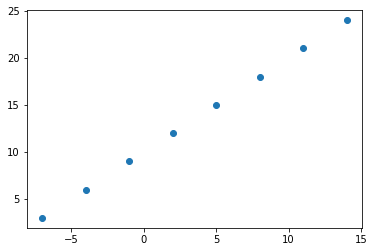

In [3]:
plt.scatter(X,y)

In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [5]:
 #input and output shapes

 #Predicting housing prices example
house_info = tf.constant(['Beds', 'baths', 'garage'])
house_price = tf.constant([939700])
house_info, house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'Beds', b'baths', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

Case above house info shape is 3 and house price is shape = 1

In [6]:
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

((8,), (8,))

^ this doesn't make the most sense becuase we only want to look at one sample 

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

^doesn't seem to have a shape because it has zero dimensions

In [8]:
X[0], y[0]

(-7.0, 3.0)

we want to predict one x value with one y value

In [9]:
#Turn numpy array into tensors
X = tf.constant(X)
y = tf.constant(y)

X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

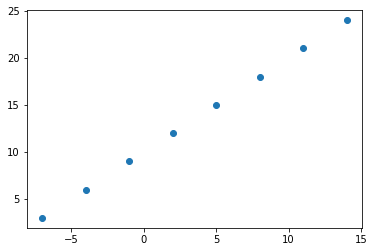

In [11]:
plt.scatter(X,y)

## Steps in modeling with tensorflow

1. Creating a model - define the input and output layers as well as the hideen layers of deep learning models
2. compile a model - define the loss function (the function which tells our model how wrong it is) and the optimizer. (tell the model how to improve the patterns and its learning) and evaluation metrics(what we can use to inerpret the performance of the model)
3. Fitting the model try to find the patterns between X and y(features and labels)



In [12]:
# setting random seed for reproducibility
tf.random.set_seed(42)

#1. create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae, #mae is for mean aboslute error
              optimizer = tf.keras.optimizers.SGD(),#stochastic gradient descent
              metrics=['mae'])

#  3. Fit the model 
model.fit(tf.expand_dims(X, axis=1), y, epochs=5) # epochs set how many times the model goes thru the training data

Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748


In [13]:
#Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [14]:
#Try and make prediction using above model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 68ms/step


array([[12.716021]], dtype=float32)

In [15]:
y_pred + 11

array([[23.71602]], dtype=float32)

In [16]:
# # practice writing out a model
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
# model.add(tk.keras.layers.Dense(4))

## improving the model

We can improve the model by altering the steps we took to create a model

1. ** creating the model** we might add more layers, increase number of hidden units(also called neurons) within each of the hidden layers, change the activiation function of each layer

2. ** Compiling the model - might change the optimization function or the learning rate of the optimization function

3. ** Fitting the model - might fit the model for more epochs(look at training more times) or on more data(give model more examples)

In [17]:
#lets rebuild the model
#1. create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics = ['mae'])

#. fit the model but train longer
model.fit(tf.expand_dims(X, axis=1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 263ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 8

In [18]:
#remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [19]:
#lets see if predictions have improved
model.predict([17.0])

1/1 [==============================] - 0s 45ms/step


array([[29.739855]], dtype=float32)

In [20]:
#Rewritting the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

#2. compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics= ['mae'])

# 3. Fitting the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 288ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.7804 - mae: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 11.2324 - mae: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.6601 - mae: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.0632 - mae: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 9.4503 - mae: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 8.7991 - mae: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 8.1072 - mae: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 7.3691 - mae: 7.3691
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 6.5758 - mae: 6.5758
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - 

In [21]:
model.predict([17.0])

1/1 [==============================] - 0s 67ms/step


array([[31.223133]], dtype=float32)

In [22]:
#more model improvements.
#1. set up model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

#2. compile
model.compile(loss = 'mae',
              optimizer = tf.keras.optimizers.Adam(lr=.01),
              metrics=['mae'])
#3. fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 338ms/step - loss: 12.2895 - mae: 12.2895
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.5828 - mae: 11.5828
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 10.8658 - mae: 10.8658
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.1377 - mae: 10.1377
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 9.3973 - mae: 9.3973
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 8.6426 - mae: 8.6426
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 7.8717 - mae: 7.8717
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 7.0828 - mae: 7.0828
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 6.8696 - mae: 6.8696
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 7.2795 - mae: 7.2795
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 7.5933 - 

Evaluating a model

in practive the typical workflow youll go through when building a nueral network is:

create a modle, compile the model, fit the model. evaluate, tweak, evaluate, tweak, evaluate

when it comes to evaluate just vizualize visualize, visualize

* what should we visualize?

the data what does the data were working with look like

The model itself how does our model look

The training of the model, how does a model perform while it learns

the predictions of the model

In [23]:
#lets make a bigger data set

X=tf.range(-100, 100, 4)

X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [24]:
#make labels for the dataset
y= X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

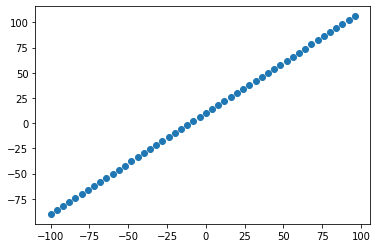

In [25]:
#visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [26]:
### splitting data into three sets, train, validate, test
# training is usually 70-80%
#validate is usually 10-15%
# test is usually 10-15%

len(X)

50

In [27]:
#Splitting the training set
X_train = X[:40] # the first 40 training samples
y_train = y[:40]

X_test = X[40:] #last ten is test
y_test = y[40:]



In [28]:
len(X_train)

40

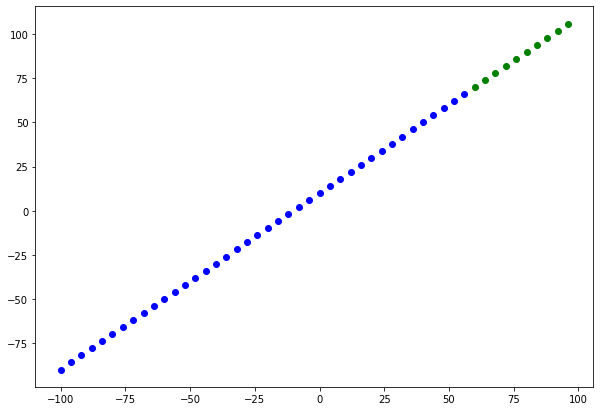

In [29]:
# Visualizing the sets
plt.figure(figsize=(10,7))
#Plotting the training data
plt.scatter(X_train, y_train, c='b', label = 'Training data')

#plotting the test data
plt.scatter(X_test, y_test, c='g', label = 'Test data')

In [30]:
# build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)

])

#Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics= ['mae'])

#Fit the model
model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 47.1280 - mae: 47.1280
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 15.7179 - mae: 15.7179
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 15.0809 - mae: 15.0809
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 8.1832 - mae: 8.1832
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 10.6664 - mae: 10.6664
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.8707 - mae: 9.8707
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 8.9399 - mae: 8.9399
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0851 - mae: 9.0851
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 19.6577 - mae: 19.6577
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.6254 - mae: 10.6254
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - 

In [31]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fa05273bfd0>>

In [32]:
#create model which builds automatically
tf.random.set_seed(42)

#create a model
model_build = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

#compile a modeal
model_build.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics= ['mae'])



In [33]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total params = total number of parameters in the model
*Trainable parameters - these are the parameters (patterns) the model can update as it trains

* non traingable params - these arent updated during training, typical when you bring in already learned patterns or parameters from other models during transfer learning.

In [41]:
# build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)

])

#Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics= ['mae'])

#Fit the model
model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 42.5822 - mae: 42.5822
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 10.9331 - mae: 10.9331
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 26.9259 - mae: 26.9259
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 13.6703 - mae: 13.6703
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 15.1926 - mae: 15.1926
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 12.0801 - mae: 12.0801
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 11.4040 - mae: 11.4040
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1956 - mae: 11.1956
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 41.6513 - mae: 41.6513
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 28.8935 - mae: 28.8935
Epoch 11/100
2/2 [==============================] - 0s 5ms/

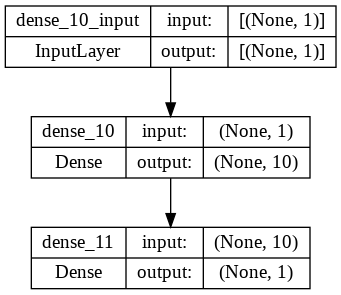

In [42]:
from tensorflow.keras.utils import plot_model

plot_model(model= model, show_shapes=True)

### Visualizing the models predictions

to visualize predictions, its a good idea to plot them against the ground truth labels

often you will see this in the form of y_test or y_true versus y_pred

true observation against predicted

In [43]:
#making predictions
y_pred = model.predict(X_test)

y_pred

1/1 [==============================] - 0s 62ms/step


array([[ 75.97803 ],
       [ 80.92618 ],
       [ 85.874344],
       [ 90.822495],
       [ 95.77066 ],
       [100.71881 ],
       [105.66698 ],
       [110.61513 ],
       [115.56328 ],
       [120.511444]], dtype=float32)

In [44]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [45]:
 #Plotting function

def plot_pred(train_data=X_train,
               train_labels = y_train,
               test_data = X_test,
               test_labels = y_test,
               predictions = y_pred):
  plt.figure(figsize=(10,7))
# plot train
  plt.scatter(train_data, train_labels, c='b', label = "Training data")

# plot test
  plt.scatter(test_data, test_labels, c='g', label='Testing data')

#plot predictions
  plt.scatter(test_data, predictions, c='r', label='predictions')

#show the legend
  plt.legend();
            
            



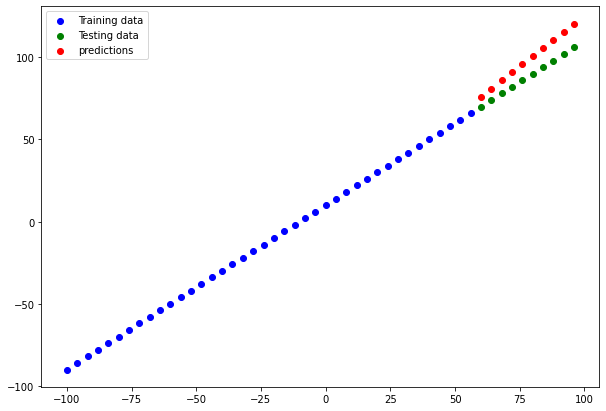

In [48]:
plot_pred(train_data = X_train,
          train_labels = y_train,
          test_data= X_test,
          test_labels = y_test,
          predictions = y_pred)